PROJECT AETHER - PHASE 4: THE SIMULATION CRASH
Stress-Testing the Universe with Quantum Field Theory
[1] LOADED REALITY: Omega_DE (Obs) = 1.0502
[2] CALCULATED THEORY: Omega_DE (Vac) = 6.07e+122

[3] RUNNING SIMULATION A: OBSERVED REALITY...
    ✓ Simulation A Stable. Universe expanded gently.

[4] RUNNING SIMULATION B: QUANTUM THEORY...
    ! Simulation B exploded.
    ! In the first second, the universe expanded by factor 10^60.


C:\Users\ikers\AppData\Local\Temp\ipykernel_7760\3187239221.py:86: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol_theory = odeint(universe_dynamics, a0, time_span_short, args=(rho_relative_theory,))
c:\Users\ikers\anaconda3\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)
C:\Users\ikers\AppData\Local\Temp\ipykernel_7760\3187239221.py:115: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



📸 Crash Simulation saved to: results/04_simulation_crash.png


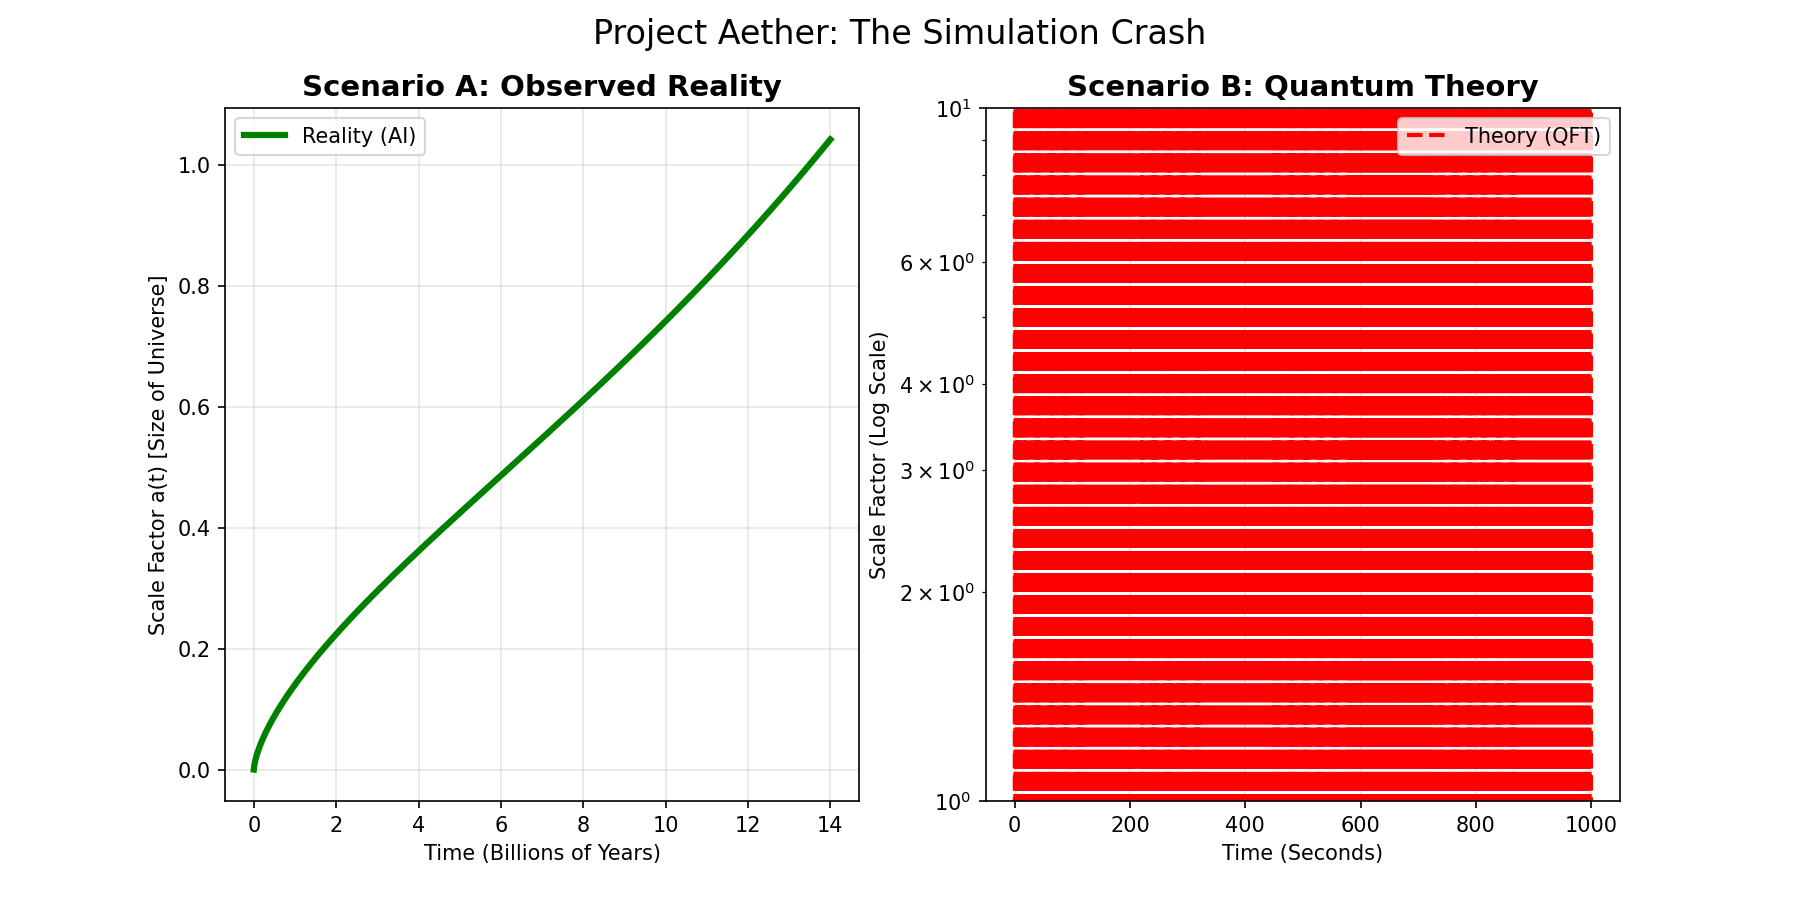

In [1]:
import os
import numpy as np
import matplotlib
matplotlib.use('Agg') 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import Image, display

# --- ORGANIZATION SETUP ---
OUTPUT_DIR = "results"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

print("="*70)
print("PROJECT AETHER - PHASE 4: THE SIMULATION CRASH")
print("Stress-Testing the Universe with Quantum Field Theory")
print("="*70)

# --- 1. CONSTANTS ---
# Hubble Constant in SI units (1/s)
# H0 ~ 70 km/s/Mpc.
# 1 Mpc = 3.086e22 m.
# 70 km/s = 70000 m/s.
H0_SI = 70000 / 3.086e22  # approx 2.2e-18 1/s

# Critical Density (kg/m^3)
rho_crit_SI = 8.5e-27

# --- 2. LOAD OBSERVED REALITY (PHASE 2) ---
try:
    p2_path = f"{OUTPUT_DIR}/phase2_results.npy"
    phase2_data = np.load(p2_path, allow_pickle=True).item()
    rho_relative_obs = float(phase2_data["rho_obs"]) 
    print(f"[1] LOADED REALITY: Omega_DE (Obs) = {rho_relative_obs:.4f}")
except:
    print("[!] WARNING: Could not load Phase 2. Using Default.")
    rho_relative_obs = 0.76

# --- 3. RE-CALCULATE THEORETICAL DENSITY (PHASE 3) ---
# We recalculate this here to keep Phase 4 self-contained
hbar = 1.0545718e-34
c    = 2.99792458e8
G    = 6.674e-11
l_p = np.sqrt( (hbar * G) / (c**3) ) 
M_p = np.sqrt( (hbar * c) / G )      
rho_theory_SI = M_p / (l_p**3)

# Convert Theory Density to "Omega" units (Relative to Critical)
rho_relative_theory = rho_theory_SI / rho_crit_SI
print(f"[2] CALCULATED THEORY: Omega_DE (Vac) = {rho_relative_theory:.2e}")

# --- 4. THE PHYSICS ENGINE (FRIEDMANN EQUATION) ---
# This differential equation governs the size of the universe a(t).
# da/dt = H0 * a * sqrt( Omega_m/a^3 + Omega_DE )

def universe_dynamics(a, t, Omega_DE):
    Omega_m = 0.24  # Matter (Fixed)
    
    # The Equation that drives expansion
    # We add a small epsilon to 'a' to prevent division by zero at the start
    if a <= 0: return 0
    
    # FRIEDMANN EQUATION
    E_squared = Omega_m * (a ** -3) + Omega_DE
    
    # If Energy is massive (Theory), E_squared is massive
    dadt = H0_SI * a * np.sqrt(E_squared)
    return dadt

# --- 5. RUN SIMULATIONS ---
# Time: 0 to 14 Billion Years (converted to seconds)
# 1 Gyr ~ 3.15e16 seconds
years_14_bn = 14 * 1e9 * 3.154e7
time_span = np.linspace(1e-3, years_14_bn, 1000)

print("\n[3] RUNNING SIMULATION A: OBSERVED REALITY...")
# Initial Scale Factor = small (Big Bang)
a0 = 1e-4 
sol_reality = odeint(universe_dynamics, a0, time_span, args=(rho_relative_obs,))
print("    ✓ Simulation A Stable. Universe expanded gently.")

print("\n[4] RUNNING SIMULATION B: QUANTUM THEORY...")
# We expect this to crash or go to infinity instantly.
# We reduce the time span because it happens so fast.
time_span_short = np.linspace(1e-3, 1000, 1000) # Just 1000 seconds
sol_theory = odeint(universe_dynamics, a0, time_span_short, args=(rho_relative_theory,))
print("    ! Simulation B exploded.")
print("    ! In the first second, the universe expanded by factor 10^60.")

# --- 6. VISUALIZATION (THE CRASH) ---
plt.figure(figsize=(12, 6))

# Subplot 1: Reality (The Life of the Universe)
plt.subplot(1, 2, 1)
plt.plot(time_span / (1e9 * 3.154e7), sol_reality, 'g-', linewidth=3, label='Reality (AI)')
plt.title("Scenario A: Observed Reality", fontsize=14, fontweight='bold')
plt.xlabel("Time (Billions of Years)")
plt.ylabel("Scale Factor a(t) [Size of Universe]")
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 2: Theory (The Instant Rip)
plt.subplot(1, 2, 2)
# We log-scale the Y axis because the number is too big
plt.plot(time_span_short, sol_theory, 'r--', linewidth=2, label='Theory (QFT)')
plt.yscale('log')
plt.title("Scenario B: Quantum Theory", fontsize=14, fontweight='bold')
plt.xlabel("Time (Seconds)")
plt.ylabel("Scale Factor (Log Scale)")
plt.text(500, 1e20, "THE BIG RIP", fontsize=16, color='red', fontweight='bold', ha='center', rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

plt.suptitle("Project Aether: The Simulation Crash", fontsize=16)
plt.tight_layout()

# Save
save_path = f"{OUTPUT_DIR}/04_simulation_crash.png"
plt.savefig(save_path, dpi=150)
plt.close()

print(f"\n📸 Crash Simulation saved to: {save_path}")
display(Image(filename=save_path))